In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model using automap_base()
Base = automap_base()
# reflect the tables with Base.prepare(), passing in the engine and reflect=True
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found with Base.classes
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our Session() and bind it to the engine
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

##### Design a query to retrieve the last 12 months of precipitation data

In [11]:
measurement = Base.classes.measurement

In [12]:
# Calculate the date 1 year ago from the last data point in the database
# Use the datetime.timedelta() function to help calculating the difference of one year, 12 months, or 365 days
latest_date = (session
 .query(measurement.date)
 .order_by(measurement.date.desc())
 .first())
latest_date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [13]:
latest_dates = (session
 .query(measurement.date)
 .filter(measurement.date >= query_date)
 .order_by(measurement.date.desc())
 .all())
latest_dates

[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-22'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-21'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-20'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-19'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-18'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-17'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-16'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-15'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-14'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-13'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-12'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-11'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-10'),
 ('2017-08-09'),
 ('2017-08-09'),
 ('2017-08-09'

In [14]:
# Use session.query() to retrieve the date and prcp columns, .filter() by the date you calculated above, and selecting .all() results
prcp_1 = (session
 .query(measurement.date, measurement.prcp)
 .filter(measurement.date >= '2016-08-23')
 .all())
prcp_1

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame() and set the index to the date column
prcp_2 = pd.DataFrame(prcp_1)
prcp_2.set_index('date')
prcp_2

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


Text(0, 0.5, 'PRCP')

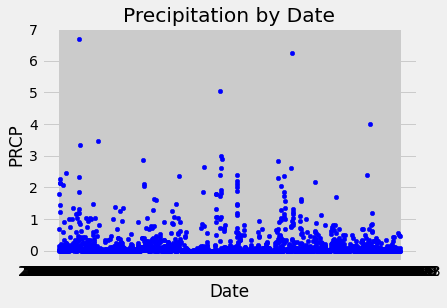

In [16]:
# Sort the dataframe by date
clean_data_df = prcp_2.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
clean_data_df.plot.scatter(x='date',
                y='prcp',
                c='blue')
plt.title('Precipitation by Date')
plt.xlabel('Date')
plt.ylabel('PRCP')

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_mean_df = clean_data_df['prcp'].mean()
prcp_median_df = clean_data_df['prcp'].median()
prcp_var_df = clean_data_df['prcp'].var()
prcp_std_df = clean_data_df['prcp'].std()
prcp_sem_df = clean_data_df['prcp'].sem()

pd.DataFrame({
    "Mean": [prcp_mean_df],
    "Median": [prcp_median_df],
    "Variance": [prcp_var_df], 
    "Standard Deviation": [prcp_std_df], 
    "SEM": [prcp_sem_df]
})

,Mean,Median,Variance,Standard Deviation,SEM
0,0.177279,0.02,0.212696,0.46119,0.010259


##### Design a query to show how many stations are available in this dataset


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order. Hint: session.query() the station column in the Station table
stations = (session
 .query(measurement.station)
 .all())
pd.DataFrame(stations).value_counts()

station    
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
stations2 = (session
 .query(measurement.tobs)
 .filter(measurement.station == 'USC00519281')) 
highest_temp = pd.DataFrame(stations2).max()
lowest_temp = pd.DataFrame(stations2).min()
pd.DataFrame({
    "Highest Temperature": highest_temp,
    "Lowest Tempearature": lowest_temp,
})

,Highest Temperature,Lowest Tempearature
tobs,85.0,54.0


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stations2 = (session
 .query(measurement.station)
 .all())
pd.DataFrame(stations2).value_counts()

station    
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
dtype: int64

In [21]:
stations2 = (session
 .query(measurement.tobs)
 .filter(measurement.station == 'USC00519281'))
latest_date2 = (session
 .query(measurement.date)
 .filter((measurement.station == 'USC00519281'))
 .order_by(measurement.date.desc())
 .first())
latest_date2
query_date2 = dt.date(2017, 8, 18) - dt.timedelta(days=365)
print(query_date2)

2016-08-18


In [22]:
latest_dates2 = (session
 .query(measurement.date)
 .filter(measurement.date <= query_date2)
 .order_by(measurement.date.desc())
 .all())
latest_dates2

[('2016-08-18'),
 ('2016-08-18'),
 ('2016-08-18'),
 ('2016-08-18'),
 ('2016-08-18'),
 ('2016-08-18'),
 ('2016-08-18'),
 ('2016-08-17'),
 ('2016-08-17'),
 ('2016-08-17'),
 ('2016-08-17'),
 ('2016-08-17'),
 ('2016-08-17'),
 ('2016-08-17'),
 ('2016-08-16'),
 ('2016-08-16'),
 ('2016-08-16'),
 ('2016-08-16'),
 ('2016-08-16'),
 ('2016-08-16'),
 ('2016-08-16'),
 ('2016-08-15'),
 ('2016-08-15'),
 ('2016-08-15'),
 ('2016-08-15'),
 ('2016-08-15'),
 ('2016-08-15'),
 ('2016-08-15'),
 ('2016-08-14'),
 ('2016-08-14'),
 ('2016-08-14'),
 ('2016-08-14'),
 ('2016-08-14'),
 ('2016-08-13'),
 ('2016-08-13'),
 ('2016-08-13'),
 ('2016-08-13'),
 ('2016-08-13'),
 ('2016-08-13'),
 ('2016-08-12'),
 ('2016-08-12'),
 ('2016-08-12'),
 ('2016-08-12'),
 ('2016-08-12'),
 ('2016-08-12'),
 ('2016-08-12'),
 ('2016-08-11'),
 ('2016-08-11'),
 ('2016-08-11'),
 ('2016-08-11'),
 ('2016-08-11'),
 ('2016-08-11'),
 ('2016-08-11'),
 ('2016-08-10'),
 ('2016-08-10'),
 ('2016-08-10'),
 ('2016-08-10'),
 ('2016-08-10'),
 ('2016-08-10'

In [23]:
highest_temps = (session
 .query(measurement.date, measurement.tobs)
 .filter(measurement.station == 'USC00519281', measurement.date >= '2016-08-18')
 .all())
highest_temps

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [24]:
highest_temps_2 = pd.DataFrame(highest_temps)
highest_temps_2.set_index('date')
frequency = highest_temps_2['tobs'].value_counts()
frequency

74.0    39
75.0    33
76.0    33
77.0    31
78.0    23
70.0    22
72.0    22
79.0    20
69.0    19
73.0    18
71.0    18
67.0    15
68.0    12
80.0    12
65.0     7
62.0     6
81.0     5
66.0     5
63.0     4
59.0     3
64.0     3
82.0     3
60.0     2
61.0     1
83.0     1
Name: tobs, dtype: int64

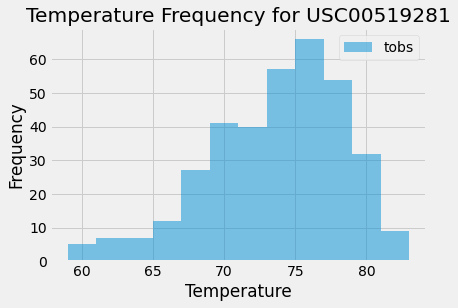

In [25]:
clean_data_df2 = highest_temps_2.sort_values('date')
clean_data_df2.plot.hist(bins=12, alpha=0.5)
plt.title('Temperature Frequency for USC00519281')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return (session.query(func.min(Measurement.tobs), 
                         func.avg(Measurement.tobs), 
                         func.max(Measurement.tobs))
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date <= end_date)
                    .all())

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [454]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    return (session.query(func.min(Measurement.tobs), 
                          func.avg(Measurement.tobs), 
                          func.max(Measurement.tobs))
                   .filter(func.strftime("%m-%d", Measurement.date) == date)
                   .all())
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
